# Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('classification_train.csv')

In [3]:
data.head(10)

,Unnamed: 0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,70,27,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,35,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,1,0,3,0,...,2,0,0,91,117,7,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,37,0,0,0,0,0,0,0,0,0
6,6,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,4,0,0,0,0,0,0,0,0,...,0,0,0,119,218,212,2,0,0,0
8,8,1,0,0,0,0,0,0,4,0,...,148,127,115,89,0,0,0,0,0,0
9,9,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
m=len(data)
m

30000

In [5]:
#importing dataset
data = pd.read_csv('classification_train.csv')
x = data.iloc[:20000,2:786].values

y = data.iloc[:20000,1].values
y=y[np.newaxis,:] #y = y.reshape(y.shape[0],1)
y=y.T

In [6]:
m, n = x.shape
x.shape,y.shape 

((20000, 784), (20000, 1))

# Pre-Processing of data

In [7]:
mu     = np.mean(x,axis=0)   
sigma  = np.std(x,axis=0) 
x_mean = (x - mu)
x_norm = (x - mu)/sigma
X=x_norm
X.shape

(20000, 784)

In [8]:
x1=np.ones((m,1))
x1.shape

(20000, 1)

In [9]:
X=np.concatenate((x1,X),axis=1)
X.shape,X

((20000, 785),
 array([[ 1.        , -0.01249488, -0.0247104 , ..., -0.15659207,
         -0.08943918, -0.03884714],
        [ 1.        , -0.01249488, -0.0247104 , ..., -0.15659207,
         -0.08943918, -0.03884714],
        [ 1.        , -0.01249488, -0.0247104 , ..., -0.15659207,
         -0.08943918, -0.03884714],
        ...,
        [ 1.        , -0.01249488, -0.0247104 , ..., -0.15659207,
         -0.08943918, -0.03884714],
        [ 1.        , -0.01249488, -0.0247104 , ..., -0.15659207,
         -0.08943918, -0.03884714],
        [ 1.        , -0.01249488, -0.0247104 , ..., -0.15659207,
         -0.08943918, -0.03884714]]))

In [10]:
""" Y: onehot encoded """
unique_values=(np.unique(y))
Y=np.zeros((m,len(unique_values)))
for i in range(m):
    for j in range(len(unique_values)):
        if y[i][0]==unique_values[j]: Y[i][unique_values[j]]=1

# Cost function

In [11]:
def sigmoid(z):
   
    g=1/(1+(np.exp(-z)))
      
    return g

In [12]:
def prediction(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [13]:
def cost_function(theta, X, Y):
    m = X.shape[0]
    y_hat = prediction(X, theta)
    return -(1/m) * (np.sum(Y*np.log(y_hat) + (1-Y)*np.log(1-y_hat)))

# Updating Parameters

In [14]:
def gradient(theta, X, Y):
    m = X.shape[0]
    y_hat = prediction(X, theta)
    return (1/m) * np.dot(X.T, y_hat - Y)

In [15]:
def gradient_descent(X, Y, max_iter, eta):
   
    cost_list = []
    theta = (np.random.randn(785, 10))*0.01

    for i in range(max_iter):
        theta= theta - eta * gradient(theta, X, Y)
        
        cost = cost_function(theta, X, Y)
        
        
        cost_list.append(cost)
        
        if(i%(max_iter/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
        
        
        
    return theta,cost_list

In [16]:
max_iter=800
eta=0.01
theta_final,cost_list=gradient_descent(X, Y, max_iter, eta)
theta_final.shape

Cost after 0 iterations is : 6.795872091517176
Cost after 80 iterations is : 4.698562919905196
Cost after 160 iterations is : 3.893998688922301
Cost after 240 iterations is : 3.3553306716388005
Cost after 320 iterations is : 2.9673736315167276
Cost after 400 iterations is : 2.6758177848107096
Cost after 480 iterations is : 2.449798942727746
Cost after 560 iterations is : 2.270198929184516
Cost after 640 iterations is : 2.12451974322447
Cost after 720 iterations is : 2.0042729877193923


(785, 10)

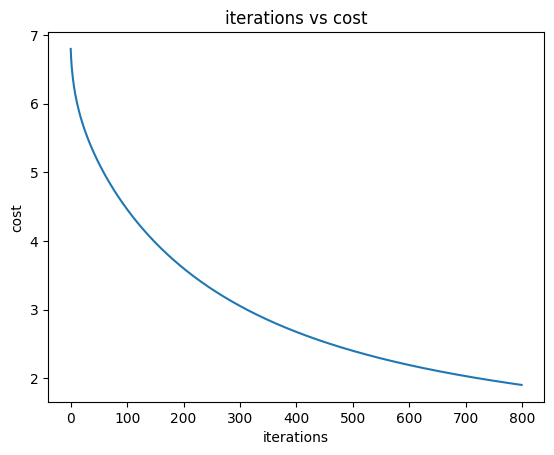

In [17]:
t = np.arange(0, max_iter)
plt.plot(t,cost_list)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("iterations vs cost")

plt.show()

# Accuracy on train data

In [18]:
Z=prediction(X, theta_final)
Z.shape

(20000, 10)

In [19]:
pred=np.argmax(Z, axis=1)

In [20]:
count=0
for i in range(m):
    
    if y[i,0] ==pred[i]:
        count+=1 
print(count)

16234


In [21]:
accuracy=(count/m)*100
print('Accuracy on test data = '+str(math.ceil(accuracy))+'%')
print('Accuracy on test data = '+str(round(accuracy,2))+'%')

Accuracy on test data = 82%
Accuracy on test data = 81.17%


# Accuracy on test data

In [22]:
x_test = data.iloc[20000:,2:].values

y_test = data.iloc[20000:,1].values
y_test = y_test.reshape(y_test.shape[0],1)
m_test,n_test=x_test.shape
x_test.shape

(10000, 784)

In [23]:
mu     = np.mean(x_test,axis=0)   
sigma  = np.std(x_test,axis=0) 
x_mean = (x_test - mu)
x_norm = (x_test - mu)/sigma
x_test=x_norm
x_test.shape

(10000, 784)

In [24]:
x2=np.ones((m_test,1))
x_test=np.concatenate((x2,x_test),axis=1)
x_test.shape

(10000, 785)

In [25]:
Z_test=prediction(x_test, theta_final)
Z_test.shape

(10000, 10)

In [26]:
pred_test=np.argmax(Z_test, axis=1)

In [27]:
count=0
for i in range(m_test):
    
    if y_test[i,0] ==pred_test[i]:
        count+=1 
print(count)

8047


In [28]:
accuracy=(count/m_test)*100
print('Accuracy on test data = '+str(math.ceil(accuracy))+'%')
print('Accuracy on test data = '+str(round(accuracy,2))+'%')

Accuracy on test data = 81%
Accuracy on test data = 80.47%


# Finding labels for classification_test

In [29]:
#importing dataset
data_pred = pd.read_csv('classification_test.csv')
x_pred = data_pred.iloc[:,1:785].values
x_pred.shape
m_pred,n_pred=x_pred.shape

In [30]:
mu     = np.mean(x_pred,axis=0)   
sigma  = np.std(x_pred,axis=0) 
x_mean = (x_pred - mu)
x_norm = (x_pred - mu)/sigma
x_pred=x_norm
x_pred.shape


(10000, 784)

In [31]:
data_pred.shape

(10000, 785)

In [32]:
x2=np.ones((m_pred,1))
x2.shape

(10000, 1)

In [33]:
x_pred=np.concatenate((x2,x_pred),axis=1)
x_pred.shape

(10000, 785)

In [34]:
Z_test=prediction(x_pred, theta_final)
Z_test.shape

(10000, 10)

In [35]:
pred_test=np.argmax(Z_test, axis=1)
pred_test

array([0, 1, 2, ..., 8, 6, 2], dtype=int64)

In [36]:
pred_test=pred_test[np.newaxis,:]
pred_test=pred_test.T
pred_test.shape

(10000, 1)

In [37]:
data_pred.insert(0,'label',pred_test)

In [38]:
#saving the dataframe as a csv file
data_pred.to_csv('classification_test_pred.csv',index=False)